## Welcome to the one more WEEKEND Project!

This time we are working with **Crop Price Prediction** DataSet.

The basic steps to follow:
1. Data Exploration  
2. Data Discrepencies (If any?)  
3. Modelling  
4. Inferences  

### Let's being then!

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve
import math,sklearn
from sklearn import metrics

In [2]:
crop_df = pd.read_csv('corn yield.csv',thousands = ',')
crop_df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,245000.0,NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,36015000.0,NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,9000.0,NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15.0,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,34000.0,NaN


In [3]:
crop_df.shape

(23474, 21)

In [4]:
# We will build a Data frame in order to check the missing values over and over again!
def missing_value_df(df):
    missing_value = df.isnull().sum()
    missing_value_percent = round(100*(df.isnull().sum()/len(df)),2)
    columns_we_need = df.columns
    df_we_return = pd.DataFrame({'Missing Values': missing_value,'Percentage of Missing':missing_value_percent})
    return df_we_return

In [5]:
missing_value_df(crop_df)

,Missing Values,Percentage of Missing
Program,0,0.00
Year,0,0.00
Period,0,0.00
Week Ending,23474,100.00
Geo Level,0,0.00
State,0,0.00
State ANSI,34,0.14
Ag District,23474,100.00
Ag District Code,23474,100.00
County,23474,100.00


Ok, now We see that we have missing values upto **100%** for 9 columns and since this is Crop Data Set, we can drop the columns such as **Ag District Code,County,County ANSI,ZIP and Region** along with **CV(%)** and **Watershed**.

Let's drop them!

In [6]:
drop_cols = ['Week Ending','Ag District','Ag District Code','County','County ANSI','Zip Code','Region','Watershed','CV (%)']
crop_df_1 = crop_df.drop(drop_cols,axis = 1)
crop_df_1.shape

(23474, 12)

In [7]:
missing_value_df(crop_df_1)

,Missing Values,Percentage of Missing
Program,0,0.00
Year,0,0.00
Period,0,0.00
Geo Level,0,0.00
State,0,0.00
State ANSI,34,0.14
watershed_code,0,0.00
Commodity,0,0.00
Data Item,0,0.00
Domain,0,0.00


Now for **0.14%** missing, we can drop those rows which has missing. We would loose only 34 Rows

In [8]:
crop_df_1 = crop_df_1.dropna(axis=0)
crop_df_1.shape

(23440, 12)

In [9]:
missing_value_df(crop_df_1)

,Missing Values,Percentage of Missing
Program,0,0.0
Year,0,0.0
Period,0,0.0
Geo Level,0,0.0
State,0,0.0
State ANSI,0,0.0
watershed_code,0,0.0
Commodity,0,0.0
Data Item,0,0.0
Domain,0,0.0


**Awesome! Now let's start EDA!!**

In [10]:
crop_df_1.head()

,Program,Year,Period,Geo Level,State,State ANSI,watershed_code,Commodity,Data Item,Domain,Domain Category,Value
0,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,245000.0
1,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,36015000.0
2,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,9000.0
3,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15.0
4,SURVEY,2015,YEAR,STATE,ARIZONA,4.0,0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,34000.0


In [11]:
# Let's check the unique values for Columns such as PROGRAM,YEAR,PERIOD,GEO LEVEL,STATE and other columns too
def check_unique(df):
    cols_of_df = df.columns
    for i in cols_of_df:
        print('Column:',i)
        print('Unique Values are:',df[i].unique())

In [12]:
check_unique(crop_df_1)

Column: Program
Unique Values are: ['SURVEY']
Column: Year
Unique Values are: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977 1976 1975 1974
 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963 1962 1961 1960
 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1947 1946
 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934 1933 1932
 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920 1919 1918
 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906 1905 1904
 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894 1893 1892 1891 1890
 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880 1879 1878 1877 1876
 1875 1874 1873 1872 1871 1870 1869 1868 1867 1866]
Column: Period
Unique Values are: ['YEAR' 'YEAR - AUG FORECAST' 'YEAR - JUN FORECAST' 'YEAR - NOV FORECAST'
 'YEAR - OCT FORECAST' 'YEAR - SEP FORECAST']
Column

In [13]:
crop_df_1.describe()

,Year,State ANSI,watershed_code,Value
count,23440.000000,23440.000000,23440.0,2.344000e+04
mean,1954.194710,30.023379,0.0,3.680734e+07
std,40.336799,15.388973,0.0,1.675577e+08
min,1866.000000,1.000000,0.0,1.100000e+00
25%,1925.000000,18.000000,0.0,9.000000e+03
50%,1956.000000,30.000000,0.0,2.780000e+05
75%,1989.000000,42.000000,0.0,4.950000e+06
max,2015.000000,56.000000,0.0,2.505600e+09


Ok, we will setup some task here:
<li> We will try to bin the <b> YEARS </b> and try to plot against the value, which is our target variable.  
<li>Next, we can the effect of <b> Data Item</b> and <b> States </b> in a more sophisticated way!
    </li>
    
This will help us in drawing ome **EDA Inferences**.  
Next to which we will be looking for **Outlier Treatments** if any for our Numerical Colummns and thyen we will again comeback for further development!

In [14]:
# Binning years
crop_df_1['Year Bin'] = pd.cut(crop_df_1.Year,bins = 15)

In [15]:
crop_df_1['Year Bin'].value_counts()
# Please note that we have the interval on the basis of 10 years Span!

(2005.067, 2015.0]      2872
(1935.533, 1945.467]    1920
(1925.6, 1935.533]      1918
(1945.467, 1955.4]      1904
(1955.4, 1965.333]      1846
(1965.333, 1975.267]    1786
(1995.133, 2005.067]    1772
(1975.267, 1985.2]      1764
(1985.2, 1995.133]      1760
(1915.667, 1925.6]      1624
(1905.733, 1915.667]     954
(1895.8, 1905.733]       934
(1885.867, 1895.8]       890
(1875.933, 1885.867]     782
(1865.851, 1875.933]     714
Name: Year Bin, dtype: int64

In [16]:
# Do ignore the Decimal Values, as we have 149 years in total and binning them in 15 bins would obvioulsy break into decimals!
crop_df_1.loc[750]

Program                                   SURVEY
Year                                        2014
Period                       YEAR - JUN FORECAST
Geo Level                                  STATE
State                                    INDIANA
State ANSI                                    18
watershed_code                                 0
Commodity                                   CORN
Data Item          CORN, GRAIN - ACRES HARVESTED
Domain                                     TOTAL
Domain Category                    NOT SPECIFIED
Value                                   5.85e+06
Year Bin                      (2005.067, 2015.0]
Name: 750, dtype: object

In [17]:
crop_df_1.head()

,Program,Year,Period,Geo Level,State,State ANSI,watershed_code,Commodity,Data Item,Domain,Domain Category,Value,Year Bin
0,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,245000.0,"(2005.067, 2015.0]"
1,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,36015000.0,"(2005.067, 2015.0]"
2,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,9000.0,"(2005.067, 2015.0]"
3,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,0,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15.0,"(2005.067, 2015.0]"
4,SURVEY,2015,YEAR,STATE,ARIZONA,4.0,0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,34000.0,"(2005.067, 2015.0]"


In [18]:
crop_df_1.dtypes

Program              object
Year                  int64
Period               object
Geo Level            object
State                object
State ANSI          float64
watershed_code        int64
Commodity            object
Data Item            object
Domain               object
Domain Category      object
Value               float64
Year Bin           category
dtype: object

In [19]:
groupbydf_Year_Bin = crop_df_1.groupby('Year Bin')['Value'].sum().reset_index()

In [20]:
groupbydf_Year_Bin

,Year Bin,Value
0,"(1865.851, 1875.933]",1.069086e+10
1,"(1875.933, 1885.867]",1.731164e+10
2,"(1885.867, 1895.8]",2.064935e+10
3,"(1895.8, 1905.733]",2.619574e+10
4,"(1905.733, 1915.667]",2.771615e+10
5,"(1915.667, 1925.6]",2.522290e+10
6,"(1925.6, 1935.533]",2.146696e+10
7,"(1935.533, 1945.467]",2.455733e+10
8,"(1945.467, 1955.4]",2.889643e+10
9,"(1955.4, 1965.333]",3.670823e+10


In [21]:
groupbydf_Year_Bin = groupbydf_Year_Bin.sort_values(['Year Bin']).reset_index(drop=True)
# This was not needed, but still we did this!

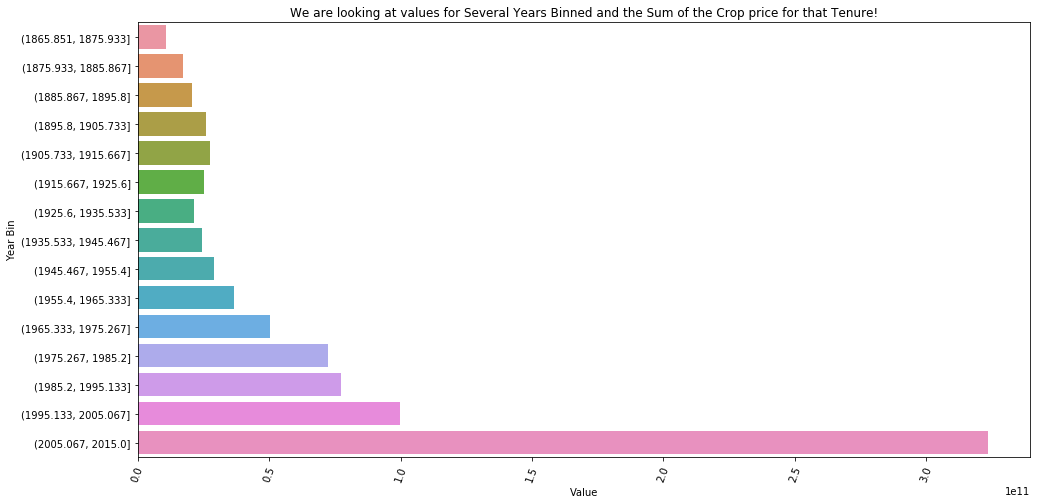

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'Value',y = 'Year Bin',data = groupbydf_Year_Bin);
plt.xticks(rotation = 70);
plt.title('We are looking at values for Several Years Binned and the Sum of the Crop price for that Tenure!');
#plt.xscale('log')

What can we say from this?  
**There is a continuous increase in the Price as Value for the Crop over the Years!**  
The one thing to notice is **in the duration from 1905 to 1915 had more VALUE than 1925 to 1935** and we can see that there are 2 or more such phases!     
Next we can see in the Phase of **2005 to 2015**, the prices have gone exponentially high and that is very good from Garmer's perspective as he get to sell it at the valid price!!  

Now we will look for the **Different Crop Items** and their value!
We can do this on **Years** which we have binned, but since there are 15 Years, we will try to see what can we do!

In [23]:
groupdf_Data_Item = crop_df_1.groupby('Data Item')['Value'].sum().reset_index()

In [24]:
groupdf_Data_Item

,Data Item,Value
0,"CORN, GRAIN - ACRES HARVESTED",1.267895e+10
1,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",8.494783e+11
2,"CORN, SILAGE - ACRES HARVESTED",6.068270e+08
3,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",5.659650e+04


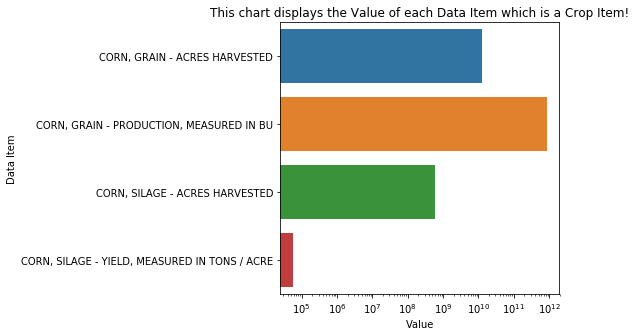

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(y = 'Data Item',x = 'Value',data = groupdf_Data_Item);
plt.xscale('log');
#plt.xticks(rotation = 80);
plt.title('This chart displays the Value of each Data Item which is a Crop Item!');

We see that **Grain** had the highest Crop value followed by **Silage!**

In [26]:
# Let's look at States
groupbydf_State = crop_df_1.groupby('State')['Value'].sum().reset_index()
groupbydf_State

,State,Value
0,ALABAMA,5.600357e+09
1,ARIZONA,1.969787e+08
2,ARKANSAS,6.035203e+09
3,CALIFORNIA,2.115969e+09
4,COLORADO,8.228477e+09
5,CONNECTICUT,1.405204e+08
6,DELAWARE,1.802654e+09
7,FLORIDA,1.114544e+09
8,GEORGIA,7.865836e+09
9,IDAHO,4.801627e+08


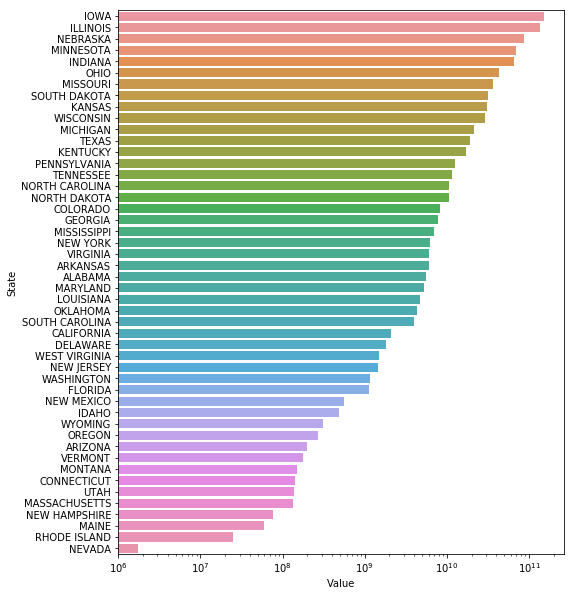

In [27]:
# Let's see if we can plot them!
groupbydf_State = groupbydf_State.sort_values(by = 'Value',ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x = 'Value',y = 'State',data = groupbydf_State);
plt.xscale('log')

The top 5 States having highest value for the Crop price are: 
1. IOWA  
2. ILLINOIS   
3. NEBRASKA  
4. MINNESOTA  
5. INDIANA  

Also, according to Google, **Iowa** is a Midwestern US State with rolling plains and Cornfileds.It is also famous for **Corn and Soyabean** production and hence is **Number 1** which we can verif from our Analysis!.
Similarly we found out for **Nebraska**, it has the more **Underground Water** than any other State in US and which leads to high quality Corn Outputs!  

Let's just do one more Informative EDA of Identifying the total value of Crop **over the period of Season!**

In [28]:
groupbydf_season = crop_df_1.groupby('Period')['Value'].sum().reset_index()
groupbydf_season

,Period,Value
0,YEAR,6.660718e+11
1,YEAR - AUG FORECAST,5.228778e+10
2,YEAR - JUN FORECAST,2.537910e+08
3,YEAR - NOV FORECAST,5.280552e+10
4,YEAR - OCT FORECAST,3.876638e+10
5,YEAR - SEP FORECAST,5.257881e+10


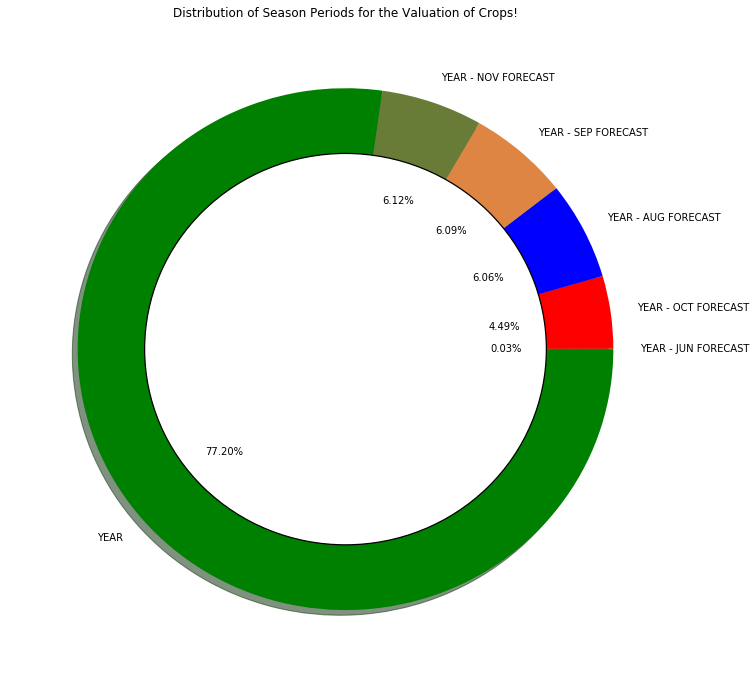

In [29]:
groupbydf_season = groupbydf_season.sort_values('Value').reset_index(drop=True)
plt.figure(figsize=(12,12))
colors = ['green', 'red','blue','#df8543','#697c37']
plt.pie(groupbydf_season["Value"], colors=colors, labels= groupbydf_season.Period,
        autopct='%1.2f%%', shadow=True);
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25);
fig = plt.gcf()
plt.title('Distribution of Season Periods for the Valuation of Crops!');
fig.gca().add_artist(centre_circle);

In [30]:
groupbydf_season

,Period,Value
0,YEAR - JUN FORECAST,2.537910e+08
1,YEAR - OCT FORECAST,3.876638e+10
2,YEAR - AUG FORECAST,5.228778e+10
3,YEAR - SEP FORECAST,5.257881e+10
4,YEAR - NOV FORECAST,5.280552e+10
5,YEAR,6.660718e+11


**Now we will look for Outliers for all the numerical variables!**  
One small piece of advice is that we can have a glance that if the data set has outliers or not, by looking at the **Statistical Description**.
Let's look and then come back for inferences!

In [31]:
crop_df_1.describe()

,Year,State ANSI,watershed_code,Value
count,23440.000000,23440.000000,23440.0,2.344000e+04
mean,1954.194710,30.023379,0.0,3.680734e+07
std,40.336799,15.388973,0.0,1.675577e+08
min,1866.000000,1.000000,0.0,1.100000e+00
25%,1925.000000,18.000000,0.0,9.000000e+03
50%,1956.000000,30.000000,0.0,2.780000e+05
75%,1989.000000,42.000000,0.0,4.950000e+06
max,2015.000000,56.000000,0.0,2.505600e+09


One thing is that we can drop this **Watershed_code** as it has 0 Standard Deviation and hence insignificant!  
Next we can feel that there is not a sudden bump or rise of vlues for the State and Year, but we will just visualize the outlier for **Value** column!


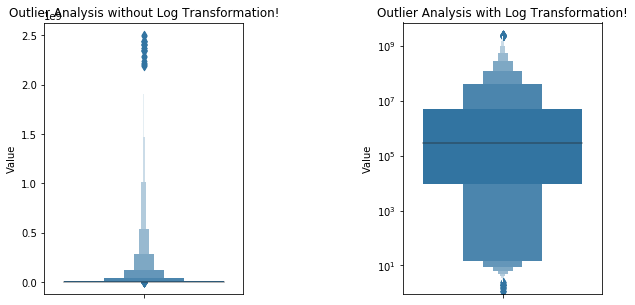

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.8)
sns.boxenplot(y= crop_df_1.Value);
plt.title('Outlier Analysis without Log Transformation!');
plt.subplot(1,2,2)
sns.boxenplot(y= crop_df_1.Value);
plt.title('Outlier Analysis with Log Transformation!');
plt.yscale('log');

In [33]:
Q1 = crop_df_1.Value.quantile(0.49)
Q3 = crop_df_1.Value.quantile(0.51)
IQR = Q3 - Q1
cleaned_df_out = crop_df_1[~((crop_df_1.Value < (Q1-1.5*IQR))|(crop_df_1.Value>(Q3+1.5*IQR)))]
cleaned_df_out.shape

(1862, 13)

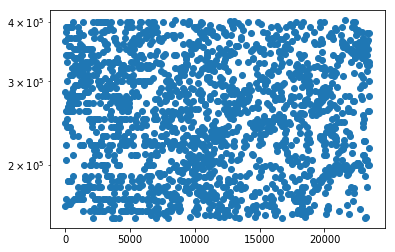

In [34]:
plt.scatter(y = cleaned_df_out.Value,x = cleaned_df_out.index);
plt.yscale('log');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


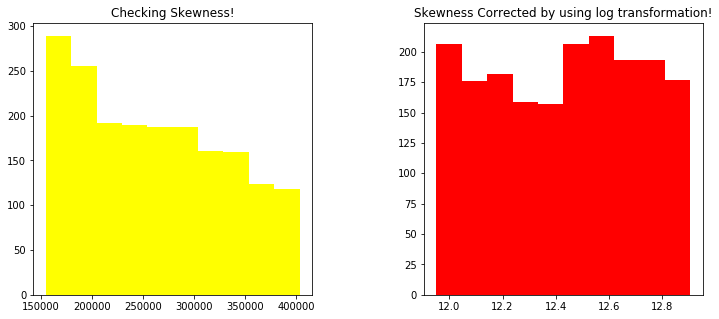

In [35]:
# Now one important analysis we want to do is to check the Skewness in our TARGET VARIABLE which is Value of the Crop as Price!!
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace = 0.4)
plt.subplot(1,2,1)
plt.hist(cleaned_df_out.Value,bins=10,color='yellow');
plt.title('Checking Skewness!');
cleaned_df_out['Price_Skew'] = np.log1p(cleaned_df_out.Value)
plt.subplot(1,2,2)
plt.hist(cleaned_df_out.Price_Skew,bins=10,color='red');
plt.title('Skewness Corrected by using log transformation!');

In [36]:
cleaned_df_out.Value.describe()

count      1862.000000
mean     260493.555317
std       71020.190811
min      155000.000000
25%      196000.000000
50%      255000.000000
75%      320000.000000
max      403000.000000
Name: Value, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


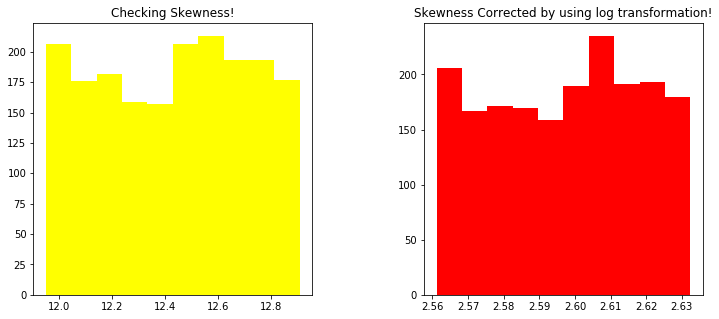

In [37]:
# Now one important analysis we want to do is to check the Skewness in our TARGET VARIABLE which is Value of the Crop as Price!!
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace = 0.4)
plt.subplot(1,2,1)
plt.hist(cleaned_df_out.Price_Skew,bins=10,color='yellow');
plt.title('Checking Skewness!');
cleaned_df_out['Price_Skewed'] = np.log1p(cleaned_df_out.Price_Skew)
#cleaned_df_out['Price_Skewed'] = np.log(cleaned_df_out.Price_Skewed)
#cleaned_df_out['Price_Skewed'] = np.log(cleaned_df_out.Price_Skewed)
#cleaned_df_out['Price_Skewed'] = np.log(cleaned_df_out.Price_Skewed)
#cleaned_df_out['Price_Skewed'] = np.log(cleaned_df_out.Price_Skewed)
plt.subplot(1,2,2)
plt.hist(cleaned_df_out.Price_Skewed,bins=10,color='red');
plt.title('Skewness Corrected by using log transformation!');

We saw that we had highly skewed data in nature to which we had to log transform 3 times! in order to find a near NORMAL DISTRIBUTION!

In [38]:
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Program,0,0.0
Year,0,0.0
Period,0,0.0
Geo Level,0,0.0
State,0,0.0
State ANSI,0,0.0
watershed_code,0,0.0
Commodity,0,0.0
Data Item,0,0.0
Domain,0,0.0


In [39]:
# Now we will drop the un-needed variables
cleaned_df_out = cleaned_df_out.drop(['watershed_code','Value','Price_Skew','Year Bin'],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Program,0,0.0
Year,0,0.0
Period,0,0.0
Geo Level,0,0.0
State,0,0.0
State ANSI,0,0.0
Commodity,0,0.0
Data Item,0,0.0
Domain,0,0.0
Domain Category,0,0.0


In [40]:
cleaned_df_out.head()

,Program,Year,Period,Geo Level,State,State ANSI,Commodity,Data Item,Domain,Domain Category,Price_Skewed
0,SURVEY,2015,YEAR,STATE,ALABAMA,1.0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2.595927
14,SURVEY,2015,YEAR,STATE,CALIFORNIA,6.0,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2.625223
22,SURVEY,2015,YEAR,STATE,DELAWARE,10.0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2.565536
30,SURVEY,2015,YEAR,STATE,GEORGIA,13.0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2.607143
36,SURVEY,2015,YEAR,STATE,IDAHO,16.0,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,2.582545


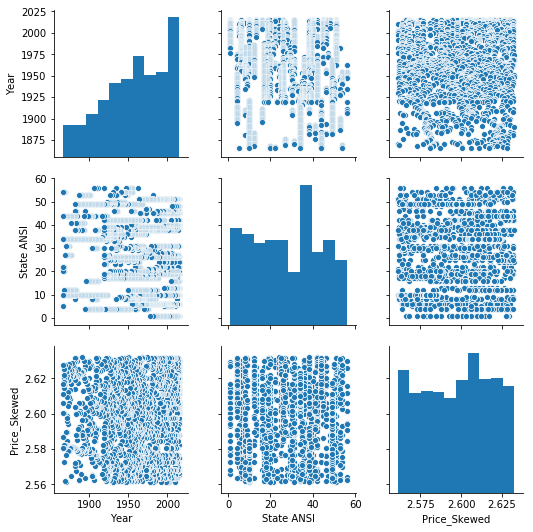

In [41]:
sns.pairplot(cleaned_df_out)

Next we will list down our **Categorical Variables** as we need to Dummy/Encode them:
1. Program  
2. Period  
3. Geo Level  
4. State(There are so many states, hence we will dummy as the model will decide which STATE is important)
5. Commodity 
6. Data Item
7. Domain 
8. Domain Category  

Next we will also look at the UNIQUE Values for each of them, for the Variables which have approx of 2 or 3 UNIQUE Values, we will dummy them along with STATES, for others we will apply **One Hot Encoding**.

In [42]:
check_unique(cleaned_df_out)

Column: Program
Unique Values are: ['SURVEY']
Column: Year
Unique Values are: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988
 1987 1986 1985 1984 1983 1982 1981 1980 1979 1978 1977 1976 1975 1974
 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963 1962 1961 1960
 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1947 1946
 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934 1933 1932
 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920 1919 1918
 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906 1905 1904
 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894 1893 1892 1891 1890
 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880 1879 1878 1877 1876
 1875 1874 1873 1872 1871 1870 1869 1868 1867 1866]
Column: Period
Unique Values are: ['YEAR' 'YEAR - AUG FORECAST' 'YEAR - JUN FORECAST' 'YEAR - NOV FORECAST'
 'YEAR - OCT FORECAST' 'YEAR - SEP FORECAST']
Column

One thing to understand is that the variables which are having only 1 unique value are of no use, as they donot convey and significant information.  
So we decide to drop them off!

In [43]:
cleaned_df_out = cleaned_df_out.drop(['Program','Commodity','Domain','Domain Category','Geo Level'],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Year,0,0.0
Period,0,0.0
State,0,0.0
State ANSI,0,0.0
Data Item,0,0.0
Price_Skewed,0,0.0


In [44]:
cleaned_df_out.dtypes

Year              int64
Period           object
State            object
State ANSI      float64
Data Item        object
Price_Skewed    float64
dtype: object

In [45]:
# So it is better to Dummy all the variables as we want States individually and Data Item too!
dummy_df = pd.get_dummies(cleaned_df_out['Period'],drop_first=True)
cleaned_df_out = pd.concat([cleaned_df_out,dummy_df],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Year,0,0.0
Period,0,0.0
State,0,0.0
State ANSI,0,0.0
Data Item,0,0.0
Price_Skewed,0,0.0
YEAR - AUG FORECAST,0,0.0
YEAR - JUN FORECAST,0,0.0
YEAR - NOV FORECAST,0,0.0
YEAR - OCT FORECAST,0,0.0


In [46]:
dummy_df = pd.get_dummies(cleaned_df_out['State'],drop_first=True)
cleaned_df_out = pd.concat([cleaned_df_out,dummy_df],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Year,0,0.0
Period,0,0.0
State,0,0.0
State ANSI,0,0.0
Data Item,0,0.0
Price_Skewed,0,0.0
YEAR - AUG FORECAST,0,0.0
YEAR - JUN FORECAST,0,0.0
YEAR - NOV FORECAST,0,0.0
YEAR - OCT FORECAST,0,0.0


In [47]:
dummy_df = pd.get_dummies(cleaned_df_out['Data Item'])
cleaned_df_out = pd.concat([cleaned_df_out,dummy_df],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Year,0,0.0
Period,0,0.0
State,0,0.0
State ANSI,0,0.0
Data Item,0,0.0
Price_Skewed,0,0.0
YEAR - AUG FORECAST,0,0.0
YEAR - JUN FORECAST,0,0.0
YEAR - NOV FORECAST,0,0.0
YEAR - OCT FORECAST,0,0.0


In [48]:
cleaned_df_out = cleaned_df_out.drop(['State','Period','Data Item'],axis=1)
missing_value_df(cleaned_df_out)

,Missing Values,Percentage of Missing
Year,0,0.0
State ANSI,0,0.0
Price_Skewed,0,0.0
YEAR - AUG FORECAST,0,0.0
YEAR - JUN FORECAST,0,0.0
YEAR - NOV FORECAST,0,0.0
YEAR - OCT FORECAST,0,0.0
YEAR - SEP FORECAST,0,0.0
ARIZONA,0,0.0
ARKANSAS,0,0.0


In [49]:
cleaned_df_out.dtypes

Year                                          int64
State ANSI                                  float64
Price_Skewed                                float64
YEAR - AUG FORECAST                           uint8
YEAR - JUN FORECAST                           uint8
YEAR - NOV FORECAST                           uint8
YEAR - OCT FORECAST                           uint8
YEAR - SEP FORECAST                           uint8
ARIZONA                                       uint8
ARKANSAS                                      uint8
CALIFORNIA                                    uint8
COLORADO                                      uint8
CONNECTICUT                                   uint8
DELAWARE                                      uint8
FLORIDA                                       uint8
GEORGIA                                       uint8
IDAHO                                         uint8
ILLINOIS                                      uint8
INDIANA                                       uint8
IOWA        

In [50]:
cleaned_df_out['Year'] = cleaned_df_out.Year.astype('category')
cleaned_df_out['Year'] = cleaned_df_out.Year.cat.codes
missing_value_df(cleaned_df_out)
# Remember we have Label Encoded the categorical variables, which means, that the range will be between 149!

,Missing Values,Percentage of Missing
Year,0,0.0
State ANSI,0,0.0
Price_Skewed,0,0.0
YEAR - AUG FORECAST,0,0.0
YEAR - JUN FORECAST,0,0.0
YEAR - NOV FORECAST,0,0.0
YEAR - OCT FORECAST,0,0.0
YEAR - SEP FORECAST,0,0.0
ARIZONA,0,0.0
ARKANSAS,0,0.0


OK, so now we have our Data Frame set to Model, let's now check for Correlation and then Start Modelling with the below RoadMap:
1. We will be Using **Linear Regression** for Price Prediction along with Ridge and Lasso Regression too.
2. Next we will be using the **Ensembling** technique such as **Decision Tree, Random Forest and XGBoost**.
3. If above models donot satusfy my Achievement which i am aiming, I will be also trying **SVM** since we have a Non-Linear Separable data points!

Let's Begin!

In [51]:
cleaned_df_out.Price_Skewed = cleaned_df_out.Price_Skewed.astype('int')

In [52]:
cleaned_df_out.shape

(1862, 55)

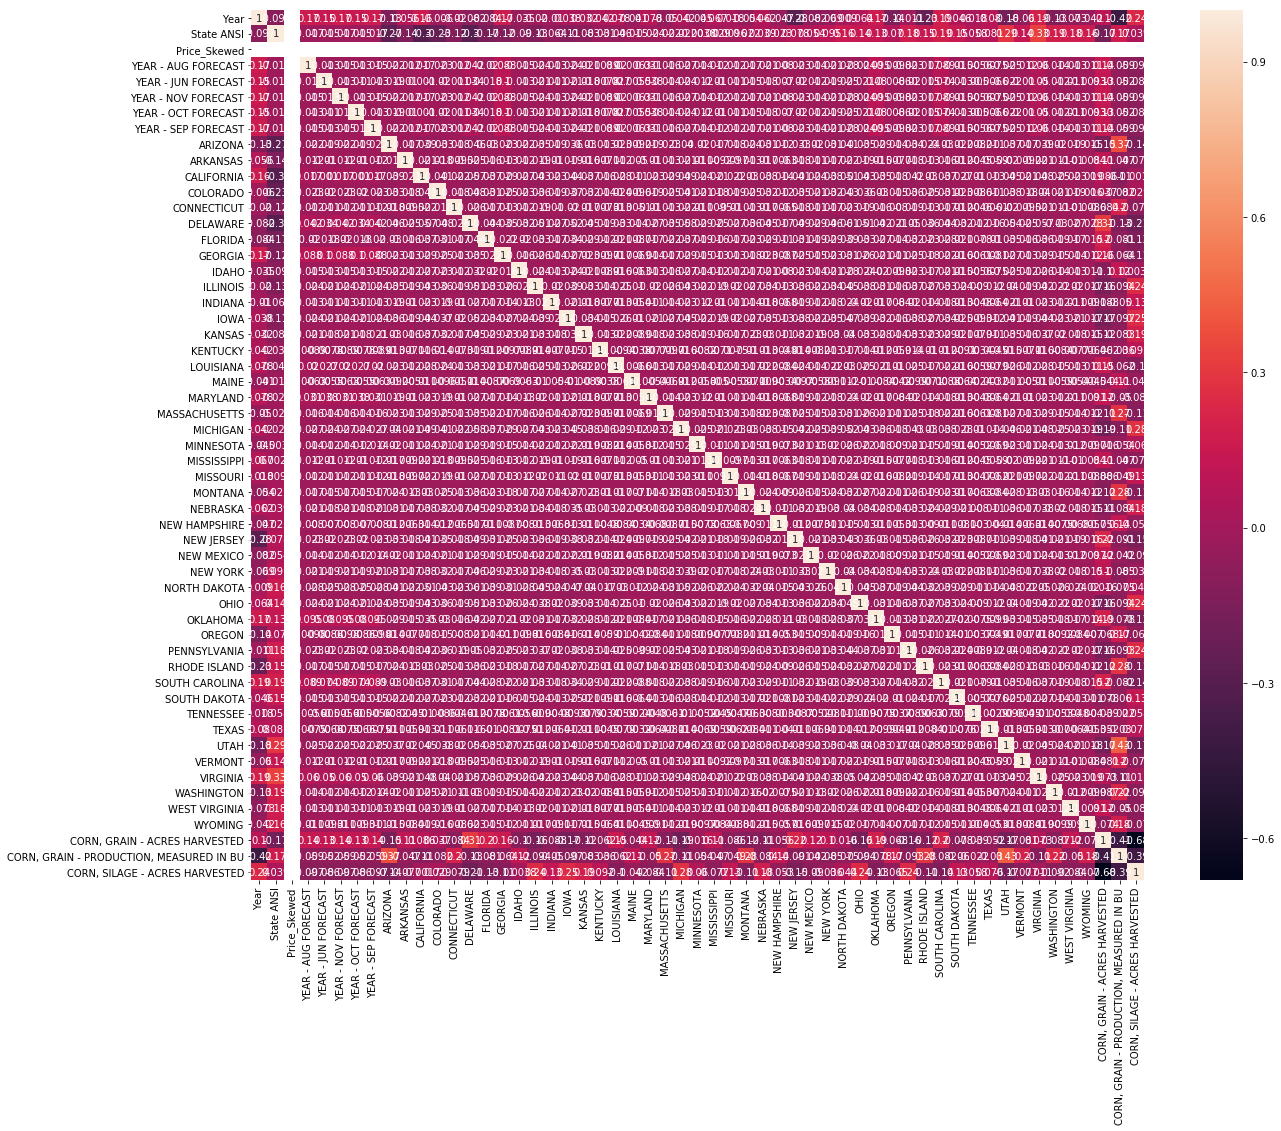

In [53]:
plt.figure(figsize=(20,16))
sns.heatmap(cleaned_df_out.corr(),annot=True);

Can you find the highly correlated **Features**? No, obvioulsy it is not possible.
I am defining a block of code, which can help in getting top 10 Correlated features and then we can see, which pair is highly correlated!
If needed, we can also perform **PCA** for more analysis!

## Finding Top CORRELATED Pairs!!

In [54]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(cleaned_df_out, 10))

Top Absolute Correlations
CORN, GRAIN - ACRES HARVESTED             CORN, SILAGE - ACRES HARVESTED              0.680320
UTAH                                      CORN, GRAIN - PRODUCTION, MEASURED IN BU    0.425760
Year                                      CORN, GRAIN - PRODUCTION, MEASURED IN BU    0.417578
CORN, GRAIN - ACRES HARVESTED             CORN, GRAIN - PRODUCTION, MEASURED IN BU    0.410465
CORN, GRAIN - PRODUCTION, MEASURED IN BU  CORN, SILAGE - ACRES HARVESTED              0.389080
ARIZONA                                   CORN, GRAIN - PRODUCTION, MEASURED IN BU    0.366773
State ANSI                                VIRGINIA                                    0.329420
DELAWARE                                  CORN, GRAIN - ACRES HARVESTED               0.308425
State ANSI                                CALIFORNIA                                  0.304072
                                          DELAWARE                                    0.295783
dtype: float64


We get to see that the highest correlated **Variable/Pair** is **CORN, GRAIN - ACRES HARVESTED with CORN, SILAGE - ACRES HARVESTED with a value of 0.68**.
We will not be dropping as we setted up a bar of 70% correlation and we can gamble with 1 pair.!

In [55]:
# Let's scale variables
scaler = StandardScaler()
y = cleaned_df_out[['Price_Skewed']]
cleaned_df_out = cleaned_df_out.drop(['Price_Skewed'],axis=1)

#y = np.array(y)

In [56]:
X_train,X_test,y_train,y_test = train_test_split(cleaned_df_out,y,test_size=0.3,random_state=4)

In [57]:
# scaling the features
scaler=StandardScaler()
# transform "x_train"
X_train = scaler.fit_transform(X_train)
# transform "x_test"
X_test = scaler.transform(X_test)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1303, 54)
(559, 54)
(1303, 1)
(559, 1)


In [59]:
# Fitting the Model!
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Finding the Scores!

In [60]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

1.0
1.0


Making Predictions!

In [61]:
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

Checking Scores!

In [62]:
print('Train Score: ',metrics.r2_score(y_train,ypred_train))
print('Test Score: ',metrics.r2_score(y_test,ypred_test))

Train Score:  1.0
Test Score:  1.0


Check the **RMSE** score!

In [63]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, ypred_test))))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_train, ypred_train))))

Root Mean Square Error test = 0.0
Root Mean Square Error test = 0.0


**We see that the model is perfroming with 100% Accuracy!** and that is kind of exciting too! but weird too!

##### One most important point is that if you are followingit properly, there is no Linear relationship of VAlue with any other Variable

Hence using a Linear regression id almost of no use. I also took a bit of time to get to understand that yes, it is perfroming this good, because it is just scattered all over the place.

What can we do then?
We can try **KNN or KMEANS**, but we have to understand that there are no clusters which we can vsually see, hence we will just try a XGBOOST Modelling and wrap up as we are able to see that the data is just not upto the mark of Modelling!

In [64]:
dtrain = xgboost.DMatrix(X_train,label = y_train)
dtest = xgboost.DMatrix(X_test,label = y_test)

In [80]:
params = {
    "eta": 0.01,
    "objective": "reg:linear",
    "subsample": 0.5,
    "eval_metric": "rmse",
    "max_depth":15,
}
model_vg_boost = xgboost.train(params, dtrain, 5000, evals = [(dtest, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-rmse:1.48502
Will train until test-rmse hasn't improved in 20 rounds.
[100]	test-rmse:0.54441
[200]	test-rmse:0.199579
[300]	test-rmse:0.073166
[400]	test-rmse:0.026822
[500]	test-rmse:0.009833
[600]	test-rmse:0.003605
[700]	test-rmse:0.001321
[800]	test-rmse:0.000484
[900]	test-rmse:0.000178
[1000]	test-rmse:6.5e-05
[1100]	test-rmse:2.4e-05
[1200]	test-rmse:9e-06
Stopping. Best iteration:
[1223]	test-rmse:6e-06

